In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from astropy.io import fits
import warnings
from scipy import optimize
# import muse_tools as mt
import matplotlib.pyplot as plt
from astropy.stats import gaussian_sigma_to_fwhm
from telassar import PVSlice
import astropy.units as u



def gauss2D(amp, x0, y0, xsig, ysig):
    return lambda x, y: amp * np.exp(-(((x0 - x)/xsig)**2 +
                                       ((y0 - y)/ysig)**2)/2)

def moments(data):
    total = np.abs(data).sum()
    Y, X = np.indices(data.shape)
    y = np.argmax((X * np.abs(data)).sum(axis = 1) / total)
    x = np.argmax((Y * np.abs(data)).sum(axis = 0) /total)
    col = data[int(y), :]
    row = data[:, int(x)]
    xwidth = np.sqrt(np.abs((np.arange(col.size) - y)*col).sum() / 
                     np.abs(col).sum())
    ywidth = np.sqrt(np.abs((np.arange(row.size) - x)*row).sum() /
                     np.abs(row).sum())
    height = data.max()
    mom = np.array([ywidth, xwidth])
    return height, y, x, ywidth, xwidth

def fitgauss(data):
    params = (moments(data))
    errorfunction = lambda p: np.ravel(gauss2D(*p)(*np.indices(data.shape)) - data)
    p, success = optimize.leastsq(errorfunction, x0 = params)
    return p

In [3]:
f = fits.open('SII_rotated_new.fits')[0]
              #'../multigauss/SII_rotated.fits')[0]
               # 'muse_sii.fits')[0]
data = f.data
hdr = f.header


In [5]:
muse_pv = np.sum(data[:, :, 16:29], axis = 2).T
#xshoo_pv = fits.open('data/HD163296_SIIF_6730.fits')[0]
#xsh_data = xshoo_pv.data
#xsh_hdr = xshoo_pv.header
#muse_pv

<IPython.core.display.Javascript object>


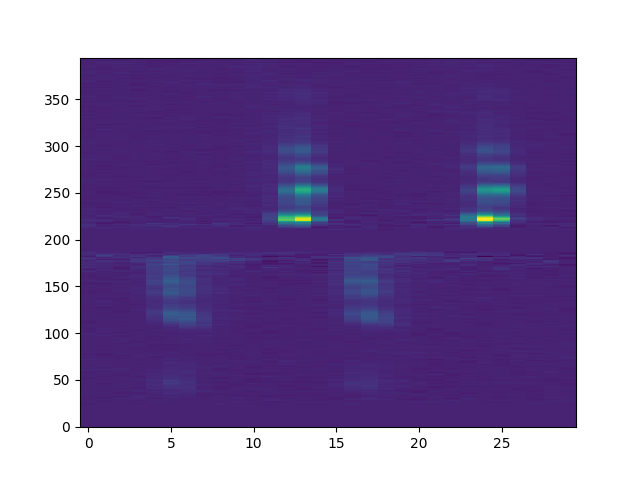

(30, 395, 43)

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt 
#plt.imshow(data[25, :, :], origin = 'lower', aspect = 'equal')
plt.imshow(muse_pv, origin = 'lower', aspect = 'auto')
data.shape

In [70]:
import logging

muse_sii = PVSlice(data = muse_pv, header=hdr)
                   # 'muse_sii.fits')
xshoo_sii = PVSlice('data/HD163296_SIIF_6730.fits')
#print(muse_sii.position.unit)
#print(xshoo_sii.position.unit)

#sub = xshoo_sii[40:50, 10:20]

#xshoo_sii.position.__logger = logging.getLogger(__name__)
'''
unit = (xshoo_sii.velwave.unit)
cdelt = xshoo_sii.velwave.wcs.wcs.get_cdelt()[0]
pc = xshoo_sii.velwave.wcs.wcs.get_pc()[0][0]
step = cdelt * pc

step = (step * unit).to(unit)#.value
print(step)'''

xshoo_sii.velwave.info()

[autoreload of telassar.world failed: Traceback (most recent call last):
  File "/home/almsivi/Documents/Python/telassar/lib64/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/almsivi/Documents/Python/telassar/lib64/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib64/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib64/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/almsivi/

AttributeError: 'CompositeUnit' object has no attribute 'replace'

In [ ]:
%matplotlib notebook

#plt.imshow(data[140:241, 60:101], origin = 'lower')
#plt.contour(fit(Y, X))
#print(p)
#plt.plot(res2)
muse_sii.position.__class__.__name__

In [ ]:
from telassar.world import get_cdelt_from_cd, wcs_from_header
from astropy.wcs import WCS

#mywcs = WCS(hdr, fix=False)
hdr = f.header
print(hdr['CUNIT3'])
wcs = wcs_from_header(hdr)#.sub([2])


'''def _wcs_from_header(hdr, naxis=None):
    if 'CD1_1' in hdr and 'CDELT3' in hdr and 'CD3_3' not in hdr:
        hdr['CD3_3'] = hdr['CDELT3']
    if 'PC1_1' in hdr and 'CDELT3' in hdr and 'PC3_3' not in hdr:
        hdr['PC3_3'] = 1
    # WCS object from data header
    return WCS(hdr, naxis=naxis)

hdr2 = hdr.copy()
hdr2.pop('CUNIT3')
mywcs2 = _wcs_from_header(hdr2, naxis = 3)
mywcs2.wcs.cunit'''
wcs.wcs.cunit

In [ ]:
%matplotlib notebook
mx = muse_sii.world.get_spatial_end()
print(muse_sii.world.get_spatial_start())
print(mx)
#muse_sii2 = muse_sii.spatial_window(amin = -35., amax = mx, unit = u.Unit('arcsec'))
#muse_sii2.world
muse_sii2.plot_contours()


#ax = plt.gca()
#ax.set_aspect('auto')
#plt.axvline(x= 6730.81)
#plt.axvline(x = 6716.44)
#muse_sii.shape

In [ ]:
%matplotlib notebook
xshoo_sii = xshoo_sii.spectral_window(vmin = -400, vmax=390, unit = u.Unit('km/s'))
xshoo2.plot_contours()


In [ ]:
trial = muse_sii2.spatial_profile(wave=[6717, 6722], arc=[0, 39], unit1=u.arcsec, unit2=u.angstrom)

In [ ]:
%matplotlib notebook

c = muse_sii2.world.offset2pix(0)
x = muse_sii2.world.pix2offset(np.arange(c, c+len(trial)-1 ))
plt.plot(x, trial)
#muse_sii2.world.pix2offset(np.arange(len(trial)))
#muse_sii2.world.pix2offset([c, c+195])